<a href="https://colab.research.google.com/github/maulinaur/test/blob/main/Text_Mining_Mandalika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Text Mining**

### **Install and Load Packages**

In [29]:
# Install packages
! pip install tweet-preprocessor
! pip install pyLDAvis

In [30]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import preprocessor as p
import numpy as np
import networkx as nx
import wordcloud
import nltk
import warnings
import itertools
import re
import os
import random
import pyLDAvis
import pyLDAvis.sklearn 

In [32]:
# Import module
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from tqdm import tqdm
from nltk import bigrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

### **Import Data**

In [107]:
# Import data
df = pd.read_csv("https://raw.githubusercontent.com/maulinaur/test/main/5_search_2022-03-25%2001_37_02_mandalika.csv")

In [108]:
# Lihat 5 baris pertama data
df.head(5)

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,2981780582,1507049688868212738,2022-03-24T17:40:20Z,reggie_gd,Until we meet again In Mandalika\n@riccardo.ro...,Twitter for Android,50,NaN,NaN,NaN,...,2865,2838,2015-01-14T05:59:03Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/29817805...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1450370963...
1,46363812,1507047274333245443,2022-03-24T17:30:44Z,AstridYogini,@HRC_MotoGP Thank you for enjoying #Lombok &am...,Twitter Web App,300,1.506981e+18,246618596.0,HRC_MotoGP,...,32626,44,2009-06-11T11:02:34Z,False,https://t.co/A1ZyczYqtL,http://astridamalia.blogspot.com,NaN,https://pbs.twimg.com/profile_banners/46363812...,http://abs.twimg.com/images/themes/theme4/bg.gif,http://pbs.twimg.com/profile_images/1341738248...
2,46363812,1504638587437940736,2022-03-18T01:59:28Z,AstridYogini,"@marcmarquez93 Halo juga, @marcmarquez93 . Sel...",Twitter Web App,175,1.504308e+18,607281049.0,marcmarquez93,...,32626,44,2009-06-11T11:02:34Z,False,https://t.co/A1ZyczYqtL,http://astridamalia.blogspot.com,NaN,https://pbs.twimg.com/profile_banners/46363812...,http://abs.twimg.com/images/themes/theme4/bg.gif,http://pbs.twimg.com/profile_images/1341738248...
3,46363812,1506698635903664128,2022-03-23T18:25:22Z,AstridYogini,@automotophoto @DoxleyO @matoxley Thank you fo...,Twitter Web App,300,1.505908e+18,44451086.0,automotophoto,...,32626,44,2009-06-11T11:02:34Z,False,https://t.co/A1ZyczYqtL,http://astridamalia.blogspot.com,NaN,https://pbs.twimg.com/profile_banners/46363812...,http://abs.twimg.com/images/themes/theme4/bg.gif,http://pbs.twimg.com/profile_images/1341738248...
4,46363812,1506332783693930498,2022-03-22T18:11:36Z,AstridYogini,"@Rins42 @MotoGP Dear Alex @Rins42 , I believe ...",Twitter Web App,288,1.506266e+18,379044969.0,Rins42,...,32626,44,2009-06-11T11:02:34Z,False,https://t.co/A1ZyczYqtL,http://astridamalia.blogspot.com,NaN,https://pbs.twimg.com/profile_banners/46363812...,http://abs.twimg.com/images/themes/theme4/bg.gif,http://pbs.twimg.com/profile_images/1341738248...


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5683 entries, 0 to 5682
Data columns (total 90 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  5683 non-null   int64  
 1   status_id                5683 non-null   int64  
 2   created_at               5683 non-null   object 
 3   screen_name              5683 non-null   object 
 4   text                     5683 non-null   object 
 5   source                   5683 non-null   object 
 6   display_text_width       5683 non-null   int64  
 7   reply_to_status_id       2139 non-null   float64
 8   reply_to_user_id         2211 non-null   float64
 9   reply_to_screen_name     2211 non-null   object 
 10  is_quote                 5683 non-null   bool   
 11  is_retweet               5683 non-null   bool   
 12  favorite_count           5683 non-null   int64  
 13  retweet_count            5683 non-null   int64  
 14  quote_count             

### **Text Preprocessing**

In [110]:
# Pilih 5 kolom teks saja
tweet = df[['text']]

# Lihat 5 baris pertama data
tweet.head()

,text
0,Until we meet again In Mandalika\n@riccardo.ro...
1,@HRC_MotoGP Thank you for enjoying #Lombok &am...
2,"@marcmarquez93 Halo juga, @marcmarquez93 . Sel..."
3,@automotophoto @DoxleyO @matoxley Thank you fo...
4,"@Rins42 @MotoGP Dear Alex @Rins42 , I believe ..."


### **Transformation**

In [125]:
# Membuat fungsi transformasi tweet
def transform_tweet(row):
  tweet = row['text']
  tweet = p.clean(tweet)
  tweet = str.lower(tweet)
  return tweet

In [126]:
# Mengaplikasikan fungsi transofrmasi
tweet['transformed'] = tweet.apply(transform_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head(5)

,text,transformed,tokenized,lemmatized,stopword
0,Until we meet again In Mandalika\n@riccardo.ro...,until we meet again in mandalika.rossi54,"[until, we, meet, again, in]","[until, we, meet, again, in]",[meet]
1,@HRC_MotoGP Thank you for enjoying #Lombok &am...,thank you for enjoying &amp; . loves you &amp;...,"[thank, you, for, enjoying, amp, loves, you, a...","[thank, you, for, enjoy, amp, love, you, amp, ...","[thank, enjoy, amp, love, amp, believe, good, ..."
2,"@marcmarquez93 Halo juga, @marcmarquez93 . Sel...","halo juga, . selamat pagi! please enjoy and th...","[halo, juga, selamat, pagi, please, enjoy, and...","[halo, juga, selamat, pagi, please, enjoy, and...","[halo, juga, selamat, pagi, please, enjoy, bre..."
3,@automotophoto @DoxleyO @matoxley Thank you fo...,thank you for enjoying &amp; . i hope you will...,"[thank, you, for, enjoying, amp, i, hope, you,...","[thank, you, for, enjoy, amp, i, hope, you, wi...","[thank, enjoy, amp, hope, enjoy, amp, especial..."
4,"@Rins42 @MotoGP Dear Alex @Rins42 , I believe ...","dear alex , i believe the asphalt on your heal...","[dear, alex, i, believe, the, asphalt, on, you...","[dear, alex, i, believe, the, asphalt, on, you...","[dear, alex, believe, asphalt, healthy, chest,..."


### **Tokenization**

In [127]:
# Download Punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [128]:
# Membuat fungsi tokenization
def tokenize_tweet(row):
    tweet = row['transformed']
    tokens = nltk.word_tokenize(tweet)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [129]:
# Mengaplikasikan fungsi tokenization
tweet['tokenized'] = tweet.apply(tokenize_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head(5)

,text,transformed,tokenized,lemmatized,stopword
0,Until we meet again In Mandalika\n@riccardo.ro...,until we meet again in mandalika.rossi54,"[until, we, meet, again, in]","[until, we, meet, again, in]",[meet]
1,@HRC_MotoGP Thank you for enjoying #Lombok &am...,thank you for enjoying &amp; . loves you &amp;...,"[thank, you, for, enjoying, amp, loves, you, a...","[thank, you, for, enjoy, amp, love, you, amp, ...","[thank, enjoy, amp, love, amp, believe, good, ..."
2,"@marcmarquez93 Halo juga, @marcmarquez93 . Sel...","halo juga, . selamat pagi! please enjoy and th...","[halo, juga, selamat, pagi, please, enjoy, and...","[halo, juga, selamat, pagi, please, enjoy, and...","[halo, juga, selamat, pagi, please, enjoy, bre..."
3,@automotophoto @DoxleyO @matoxley Thank you fo...,thank you for enjoying &amp; . i hope you will...,"[thank, you, for, enjoying, amp, i, hope, you,...","[thank, you, for, enjoy, amp, i, hope, you, wi...","[thank, enjoy, amp, hope, enjoy, amp, especial..."
4,"@Rins42 @MotoGP Dear Alex @Rins42 , I believe ...","dear alex , i believe the asphalt on your heal...","[dear, alex, i, believe, the, asphalt, on, you...","[dear, alex, i, believe, the, asphalt, on, you...","[dear, alex, believe, asphalt, healthy, chest,..."


### **Lemmatization**

In [130]:
# Download Wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [131]:
# Membuat fungsi lemmatization
def lemmatize_tweet(row):
    list = row['tokenized']
    lemmatize_list = [WordNetLemmatizer().lemmatize(w, pos= 'v') for w in list]
    return(lemmatize_list)

In [132]:
# Mengaplikasikan fungsi lemmatization
tweet['lemmatized'] = tweet.apply(lemmatize_tweet, axis=1)

# Lihat 10 baris pertama data
tweet.head(10)

,text,transformed,tokenized,lemmatized,stopword
0,Until we meet again In Mandalika\n@riccardo.ro...,until we meet again in mandalika.rossi54,"[until, we, meet, again, in]","[until, we, meet, again, in]",[meet]
1,@HRC_MotoGP Thank you for enjoying #Lombok &am...,thank you for enjoying &amp; . loves you &amp;...,"[thank, you, for, enjoying, amp, loves, you, a...","[thank, you, for, enjoy, amp, love, you, amp, ...","[thank, enjoy, amp, love, amp, believe, good, ..."
2,"@marcmarquez93 Halo juga, @marcmarquez93 . Sel...","halo juga, . selamat pagi! please enjoy and th...","[halo, juga, selamat, pagi, please, enjoy, and...","[halo, juga, selamat, pagi, please, enjoy, and...","[halo, juga, selamat, pagi, please, enjoy, bre..."
3,@automotophoto @DoxleyO @matoxley Thank you fo...,thank you for enjoying &amp; . i hope you will...,"[thank, you, for, enjoying, amp, i, hope, you,...","[thank, you, for, enjoy, amp, i, hope, you, wi...","[thank, enjoy, amp, hope, enjoy, amp, especial..."
4,"@Rins42 @MotoGP Dear Alex @Rins42 , I believe ...","dear alex , i believe the asphalt on your heal...","[dear, alex, i, believe, the, asphalt, on, you...","[dear, alex, i, believe, the, asphalt, on, you...","[dear, alex, believe, asphalt, healthy, chest,..."
5,Marc Marquez diagnosed with 'new episode' of d...,marc marquez diagnosed with 'new episode' of d...,"[marc, marquez, diagnosed, with, episode, of, ...","[marc, marquez, diagnose, with, episode, of, d...","[marc, marquez, diagnose, episode, diplopia, m..."
6,Miguel Oliveira dominates Indonesian MotoGP in...,miguel oliveira dominates indonesian motogp in...,"[miguel, oliveira, dominates, indonesian, moto...","[miguel, oliveira, dominate, indonesian, motog...","[miguel, oliveira, dominate, indonesian, motog..."
7,Me when i hear Indonesian news about F1 in Man...,me when i hear indonesian news about f1 in man...,"[me, when, i, hear, indonesian, news, about, i...","[me, when, i, hear, indonesian, news, about, i...","[hear, indonesian, news, mandalika, formula, e]"
8,bro learned a lot in Mandalika wkwowkwok https...,bro learned a lot in mandalika wkwowkwok,"[bro, learned, a, lot, in, mandalika, wkwowkwok]","[bro, learn, a, lot, in, mandalika, wkwowkwok]","[bro, learn, lot, mandalika, wkwowkwok]"
9,what an intense wet race🤯🔥\nso fuckin' proud o...,what an intense wet raceso fuckin' proud of th...,"[what, an, intense, wet, raceso, fuckin, proud...","[what, an, intense, wet, raceso, fuckin, proud...","[intense, wet, raceso, fuckin, proud, fact, ye..."


### **Stopword Removal**

In [133]:
# Download stopword bahasa inggris
nltk.download('stopwords')
stops = set(stopwords.words("english"))     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
# Membuat fungsi lemmatization
def stopword_tweet(row):
    list = row['lemmatized']
    stopword_list = [w for w in list if not w in stops]
    return(stopword_list)

In [135]:
# Mengaplikasikan fungsi Stopword
tweet['stopword'] = tweet.apply(stopword_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head(5)

,text,transformed,tokenized,lemmatized,stopword
0,Until we meet again In Mandalika\n@riccardo.ro...,until we meet again in mandalika.rossi54,"[until, we, meet, again, in]","[until, we, meet, again, in]",[meet]
1,@HRC_MotoGP Thank you for enjoying #Lombok &am...,thank you for enjoying &amp; . loves you &amp;...,"[thank, you, for, enjoying, amp, loves, you, a...","[thank, you, for, enjoy, amp, love, you, amp, ...","[thank, enjoy, amp, love, amp, believe, good, ..."
2,"@marcmarquez93 Halo juga, @marcmarquez93 . Sel...","halo juga, . selamat pagi! please enjoy and th...","[halo, juga, selamat, pagi, please, enjoy, and...","[halo, juga, selamat, pagi, please, enjoy, and...","[halo, juga, selamat, pagi, please, enjoy, bre..."
3,@automotophoto @DoxleyO @matoxley Thank you fo...,thank you for enjoying &amp; . i hope you will...,"[thank, you, for, enjoying, amp, i, hope, you,...","[thank, you, for, enjoy, amp, i, hope, you, wi...","[thank, enjoy, amp, hope, enjoy, amp, especial..."
4,"@Rins42 @MotoGP Dear Alex @Rins42 , I believe ...","dear alex , i believe the asphalt on your heal...","[dear, alex, i, believe, the, asphalt, on, you...","[dear, alex, i, believe, the, asphalt, on, you...","[dear, alex, believe, asphalt, healthy, chest,..."


### **Rejoin Token**

In [136]:
# Membuat fungsi rejoin untuk mengembalikan sebagai kalimat utuh
def rejoin_tweet(row):
    list = row['stopword']
    joined_words = ( " ".join(list))
    return joined_words

In [137]:
# Mengaplikasikan fungsi rejoin
tweet['final'] = tweet.apply(rejoin_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head(5)

,text,transformed,tokenized,lemmatized,stopword,final
0,Until we meet again In Mandalika\n@riccardo.ro...,until we meet again in mandalika.rossi54,"[until, we, meet, again, in]","[until, we, meet, again, in]",[meet],meet
1,@HRC_MotoGP Thank you for enjoying #Lombok &am...,thank you for enjoying &amp; . loves you &amp;...,"[thank, you, for, enjoying, amp, loves, you, a...","[thank, you, for, enjoy, amp, love, you, amp, ...","[thank, enjoy, amp, love, amp, believe, good, ...",thank enjoy amp love amp believe good amp brin...
2,"@marcmarquez93 Halo juga, @marcmarquez93 . Sel...","halo juga, . selamat pagi! please enjoy and th...","[halo, juga, selamat, pagi, please, enjoy, and...","[halo, juga, selamat, pagi, please, enjoy, and...","[halo, juga, selamat, pagi, please, enjoy, bre...",halo juga selamat pagi please enjoy breakfast ...
3,@automotophoto @DoxleyO @matoxley Thank you fo...,thank you for enjoying &amp; . i hope you will...,"[thank, you, for, enjoying, amp, i, hope, you,...","[thank, you, for, enjoy, amp, i, hope, you, wi...","[thank, enjoy, amp, hope, enjoy, amp, especial...",thank enjoy amp hope enjoy amp especially lake...
4,"@Rins42 @MotoGP Dear Alex @Rins42 , I believe ...","dear alex , i believe the asphalt on your heal...","[dear, alex, i, believe, the, asphalt, on, you...","[dear, alex, i, believe, the, asphalt, on, you...","[dear, alex, believe, asphalt, healthy, chest,...",dear alex believe asphalt healthy chest natura...


In [138]:
# Final tweet yang sudah di proses
tweet_clean = tweet[['final']]
tweet_clean = tweet_clean.rename(columns={'final': 'text'})

# Lihat 5 baris pertama data
tweet_clean.head(5)

,text
0,meet
1,thank enjoy amp love amp believe good amp brin...
2,halo juga selamat pagi please enjoy breakfast ...
3,thank enjoy amp hope enjoy amp especially lake...
4,dear alex believe asphalt healthy chest natura...


### **Wordcloud**

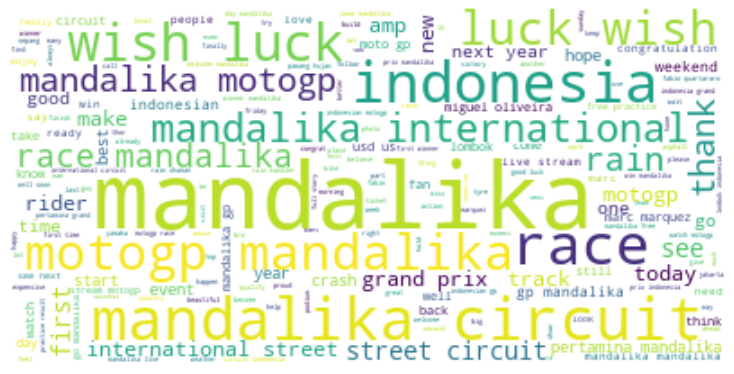

In [139]:
# Visualisasi Word Cloud
text_wordcloud = " ".join(tweet for tweet in tweet_clean.text)

cloud = WordCloud(background_color='white').generate(text_wordcloud)

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### **Sentiment Analysis**

In [140]:
# Download corpus untuk sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [141]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in tweet_clean.iterrows():
  ss = sid.polarity_scores(row['text'])
  listy.append(ss)
  
se = pd.Series(listy)
tweet_clean['polarity'] = se.values
display(tweet_clean.head(5))

,text,polarity
0,meet,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,thank enjoy amp love amp believe good amp brin...,"{'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'comp..."
2,halo juga selamat pagi please enjoy breakfast ...,"{'neg': 0.0, 'neu': 0.341, 'pos': 0.659, 'comp..."
3,thank enjoy amp hope enjoy amp especially lake...,"{'neg': 0.0, 'neu': 0.354, 'pos': 0.646, 'comp..."
4,dear alex believe asphalt healthy chest natura...,"{'neg': 0.0, 'neu': 0.305, 'pos': 0.695, 'comp..."


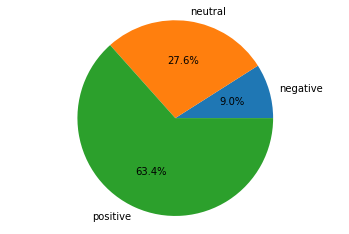

In [142]:
# Visualisasi Pie Chart
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

### **Topic Modelling**

In [143]:
# clone tambahan library dari github
! git clone https://github.com/machine-learning-ss/tm

# Set Data Directory
os.chdir('tm')

Cloning into 'tm'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [144]:
import MyLib as TS

Tweets = tweet_clean['text']
print('Total loaded tweets = {0}'.format(len(Tweets)))

Total loaded tweets = 5683


In [145]:
n_topics = 4
top_topics = 4
top_words = 10

In [146]:
# Feature Extraction
count_vector = CountVectorizer(token_pattern = r'\b[a-zA-Z]{3,}\b') 
dtm_tf = count_vector.fit_transform(Tweets)
tf_terms = count_vector.get_feature_names()

100%|██████████| 5683/5683 [00:00<00:00, 536948.77it/s]

In total there are 4 major topics, distributed as follows


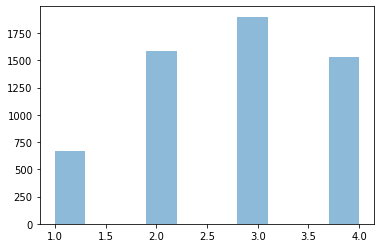

Printing top 4 Topics, with top 10 Words:
Topic #0:
mandalika welcome track weekend really race link still two yes
Topic #1:
mandalika motogp race first indonesia win marc marquez grand prix
Topic #2:
mandalika circuit race luck wish indonesia international see next motogp
Topic #3:
mandalika rain motogp live indonesia get circuit hope well people


In [147]:
# Fungsi untuk mencari topic
lda_tf = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0).fit(dtm_tf)

# Menampilkan Topik
vsm_topics = lda_tf.transform(dtm_tf); doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
print('In total there are {0} major topics, distributed as follows'.format(len(set(doc_topic))))
plt.hist(np.array(doc_topic), alpha=0.5); plt.show()
print('Printing top {0} Topics, with top {1} Words:'.format(top_topics, top_words))
TS.print_Topics(lda_tf, tf_terms, top_topics, top_words)

In [100]:
# Visualisasi Topic Secara Interaktif
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, count_vector) 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.153157  0.055407       1        1  35.138613
3      0.137449  0.035047       2        1  34.066550
2     -0.062090 -0.204134       3        1  21.832815
1     -0.228516  0.113680       4        1   8.962022, topic_info=           Term         Freq        Total Category  logprob  loglift
2769     nonton   168.000000   168.000000  Default  30.0000  30.0000
1561     jokowi   235.000000   235.000000  Default  29.0000  29.0000
2967   pembalap   376.000000   376.000000  Default  28.0000  28.0000
2124  mandalika  2102.000000  2102.000000  Default  27.0000  27.0000
108         amp    78.000000    78.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
2124  mandalika   156.788276  2102.929709   Topic4  -2.9819  -0.1840
2620     motogp   100.555405  2132.085489   Topic4  -3.4261  -0.6420
3200        pol    12.446261    37.578463   Topic4  -5.5154   1.3072
2619       moto    10.136385    30.820953   Topic4  -5.7207   1.3001
728         dan     9.808266   363.399296   Topic4  -5.7536  -1.2001

[246 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
15        1  0.502834     ada
15        2  0.131174     ada
15        3  0.364372     ada
49        1  0.171485   ajang
49        2  0.826247   ajang
...     ...       ...     ...
4276      4  0.993581  xiaomi
4294      1  0.469676    yang
4294      2  0.442341    yang
4294      3  0.086977    yang
4304      1  0.978347     yuk

[293 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

### **Text Network Analysis**

In [148]:
# Pilih teks
text = tweet_clean['text']
text

0                                                    meet
1       thank enjoy amp love amp believe good amp brin...
2       halo juga selamat pagi please enjoy breakfast ...
3       thank enjoy amp hope enjoy amp especially lake...
4       dear alex believe asphalt healthy chest natura...
                              ...                        
5678    know average price ticket mandalika suppose in...
5679                                road motogp mandalika
5680    people jakarta lower middle income far mandali...
5681    come mount mandalika indonesia next travel wor...
5682    welcome friend never forget indonesians fan wa...
Name: text, Length: 5683, dtype: object

In [149]:
# Tokenize
text_data = [word_tokenize(i) for i in text]
print(text_data)

[['meet'], ['thank', 'enjoy', 'amp', 'love', 'amp', 'believe', 'good', 'amp', 'bring', 'power', 'country', 'amp', 'people', 'moment', 'amp', 'experience', 'remember', 'forever', 'send', 'riders', 'warm', 'regard'], ['halo', 'juga', 'selamat', 'pagi', 'please', 'enjoy', 'breakfast', 'happy', 'rid', 'may', 'go', 'faster', 'best', 'warm', 'regard', 'hallelujah'], ['thank', 'enjoy', 'amp', 'hope', 'enjoy', 'amp', 'especially', 'lake', 'amp', 'especially', 'amp', 'different', 'amp', 'hope', 'get', 'good', 'experience', 'love', 'travel', 'warm', 'regard'], ['dear', 'alex', 'believe', 'asphalt', 'healthy', 'chest', 'natural', 'sign', 'amp', 'love', 'much', 'hope', 'enjoy', 'much', 'enjoy', 'lovely', 'career', 'let', 'ride', 'faster', 'amp', 'better', 'best', 'warm', 'regard', 'indonesia'], ['marc', 'marquez', 'diagnose', 'episode', 'diplopia', 'mandalika', 'accident'], ['miguel', 'oliveira', 'dominate', 'indonesian', 'motogp', 'horrendously', 'wet', 'condition'], ['hear', 'indonesian', 'news'

In [150]:
# Membuat fungsi cooccurence
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}

    bi_grams = list(bigrams(corpus))
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    return co_occurrence_matrix, vocab_index

In [151]:
# Membuat Adjacency Matrix
data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)

# Show Adjacency Matrix
data_matrix.head()

,together,us,available,ral,conditionsfull,indonesiathis,opinions,warn,insult,speedy,...,hrc,xmrprice,waduh,ramadhanafter,orange,litter,maximum,gim,satoshi,mandalikalooks
together,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
us,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
conditionsfull,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
# Membuat Network dengan Adjacency Matrix
G = nx.from_pandas_adjacency(data_matrix)

In [153]:
# Hitung Degree Centrality dan urutkan dari yang terbesar
degree = dict(sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse = True))
list_node = list(degree)

# Membuat Subraph 50 node dengan Degree Tertinggi
sampled_graph = G.subgraph(list_node[1:50])

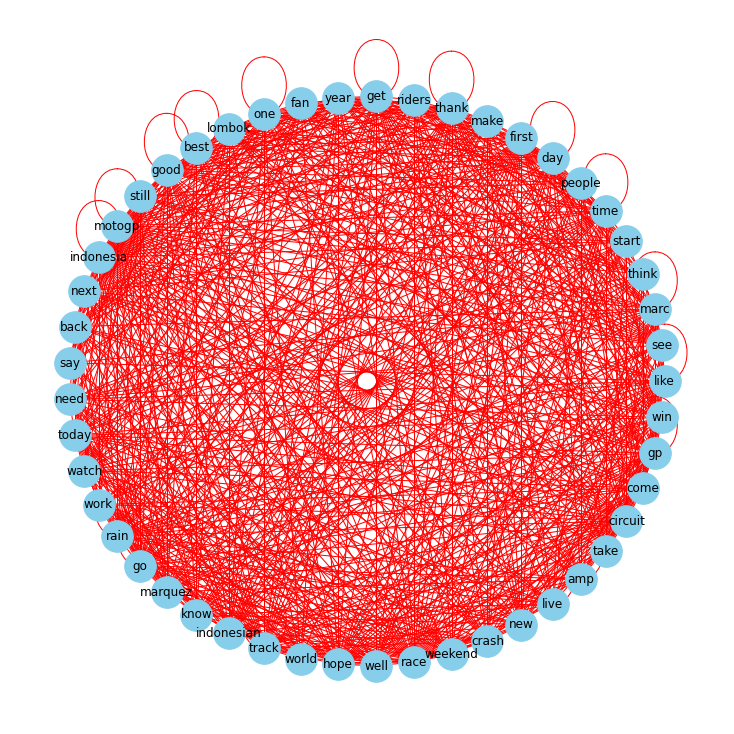

In [154]:
# Seting Ukuran Visualisasi
plt.figure(figsize=(10, 10), 
           facecolor=None)

# Visualisasi TNA
nx.draw(sampled_graph,
        with_labels = True, 
        node_color='skyblue', 
        node_size= 1000, 
        arrowstyle='->',
        arrowsize=20, 
        edge_color='red',
        font_size=12,
        pos=nx.circular_layout(sampled_graph))
